<a href="https://colab.research.google.com/github/ZarinSaima333/CSE424_PR/blob/main/CSE424_Final_Paper_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('survey lung cancer.csv')
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
df.shape

(309, 16)

In [6]:
#Null values
df.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [7]:
#duplicate rows
df.duplicated().sum()

33

In [8]:
#remove duplicate
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(276, 16)

#Data Pre-processing

In [10]:
#Categorical data to numerical data.
# Label encoding (works well with 2 category)
# 1 = YES 0 = No
#Male=1 & Female=0

In [11]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE ']=le.fit_transform(df['FATIGUE '])
df['ALLERGY ']=le.fit_transform(df['ALLERGY '])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])


In [12]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


In [13]:
import pandas as pd

# Assuming 'df' is your updated DataFrame
df.to_csv('updated_dataset.csv', index=False)

<Axes: >

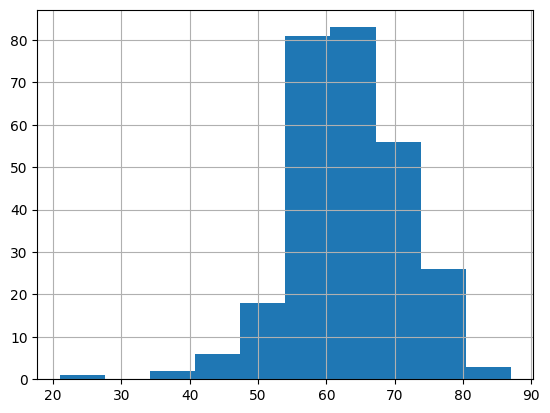

In [14]:
#plot histogram of age
df['AGE'].hist()

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['AGE'] = scaler.fit_transform(df[['AGE']])

In [16]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,0.727273,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0.803030,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0.575758,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,0.636364,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,0.636364,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,0.575758,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,0.575758,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,0.515152,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,0.378788,0,1,1,0,0,0,0,0,0,0,0,1,1,0


##Feature Engineering

In [17]:
# correlation
corr = df.corr()
corr

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,-0.013120,0.041131,-0.202506,-0.152032,-0.261427,-0.189925,-0.079020,0.150174,0.121047,0.434264,0.120228,-0.052893,-0.048959,0.361547,0.053666
AGE,-0.013120,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,0.106305
SMOKING,0.041131,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,0.034878
YELLOW_FINGERS,-0.202506,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,0.189192
ANXIETY,-0.152032,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,0.144322
PEER_PRESSURE,-0.261427,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,0.195086
CHRONIC DISEASE,-0.189925,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,0.143692
FATIGUE,-0.079020,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,0.160078
ALLERGY,0.150174,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,0.333552
WHEEZING,0.121047,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,0.249054


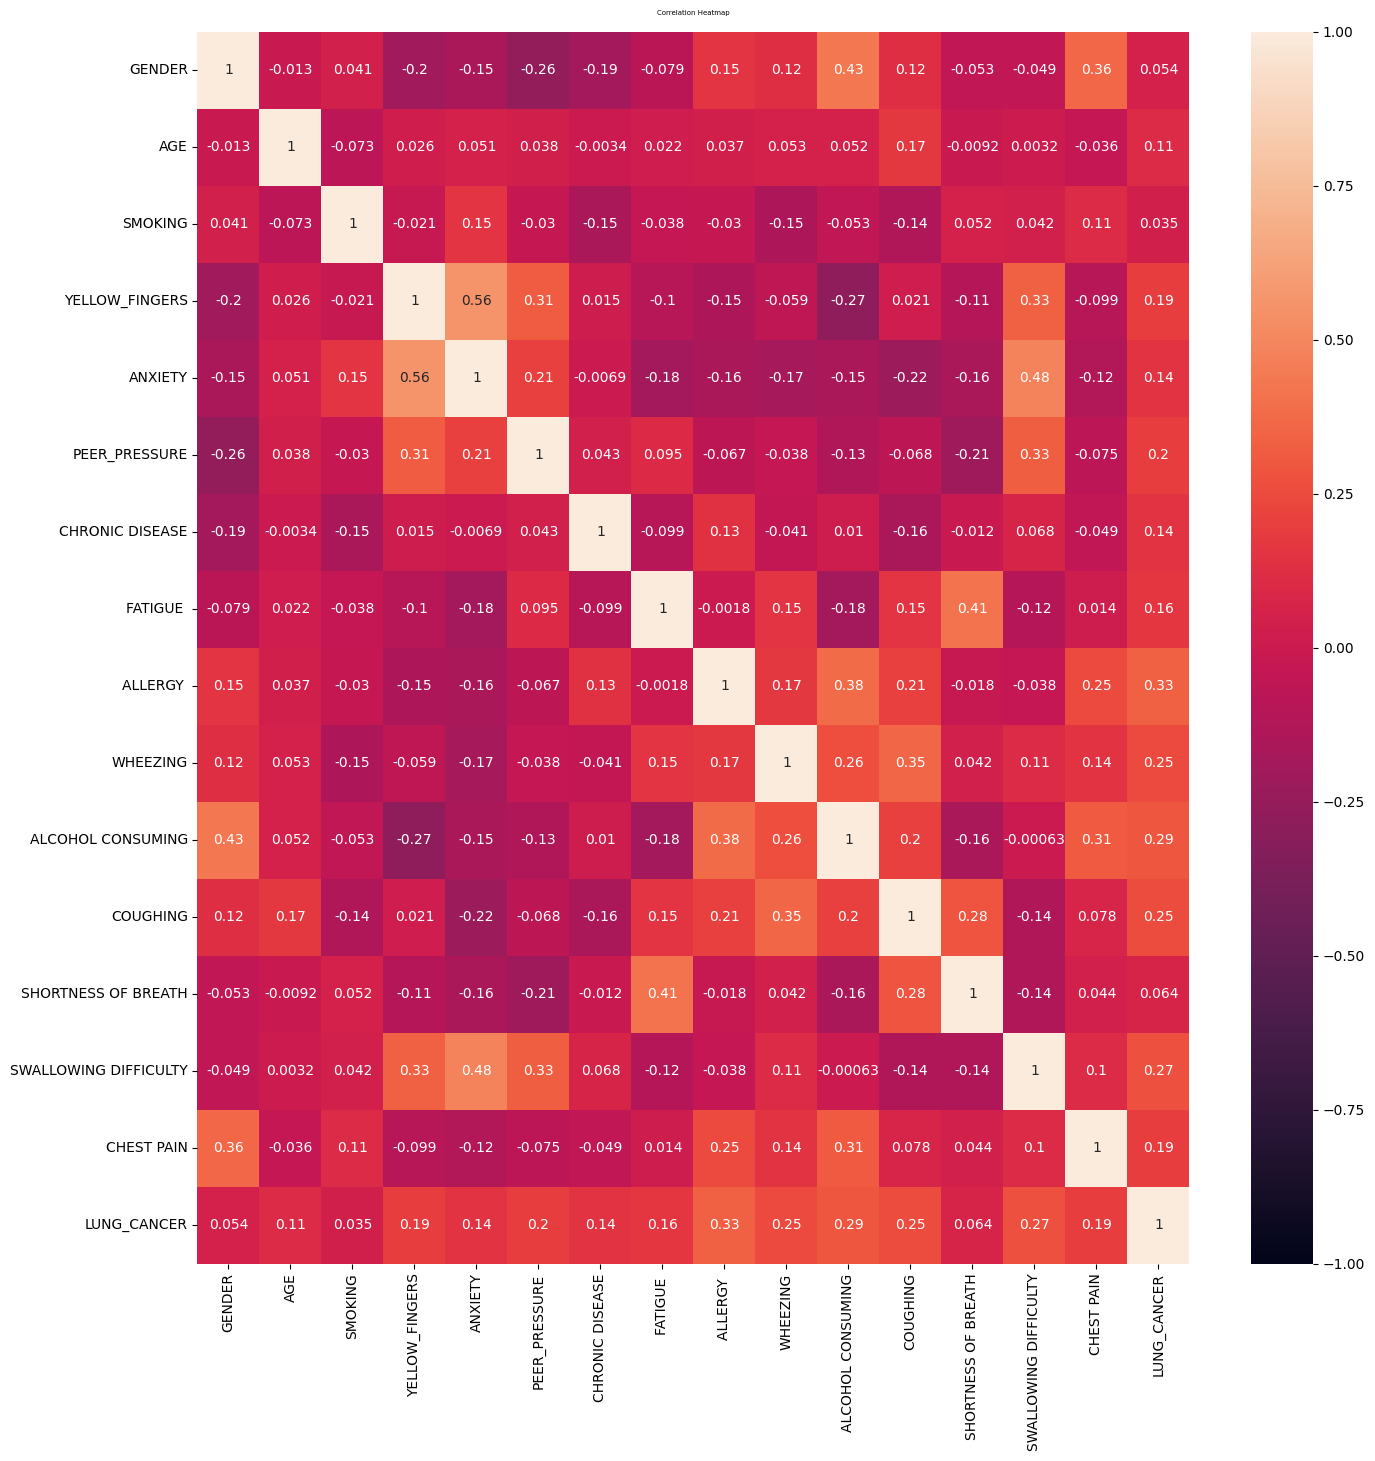

In [18]:
plt.figure(figsize=(16, 16))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':5}, pad=12);

<Axes: >

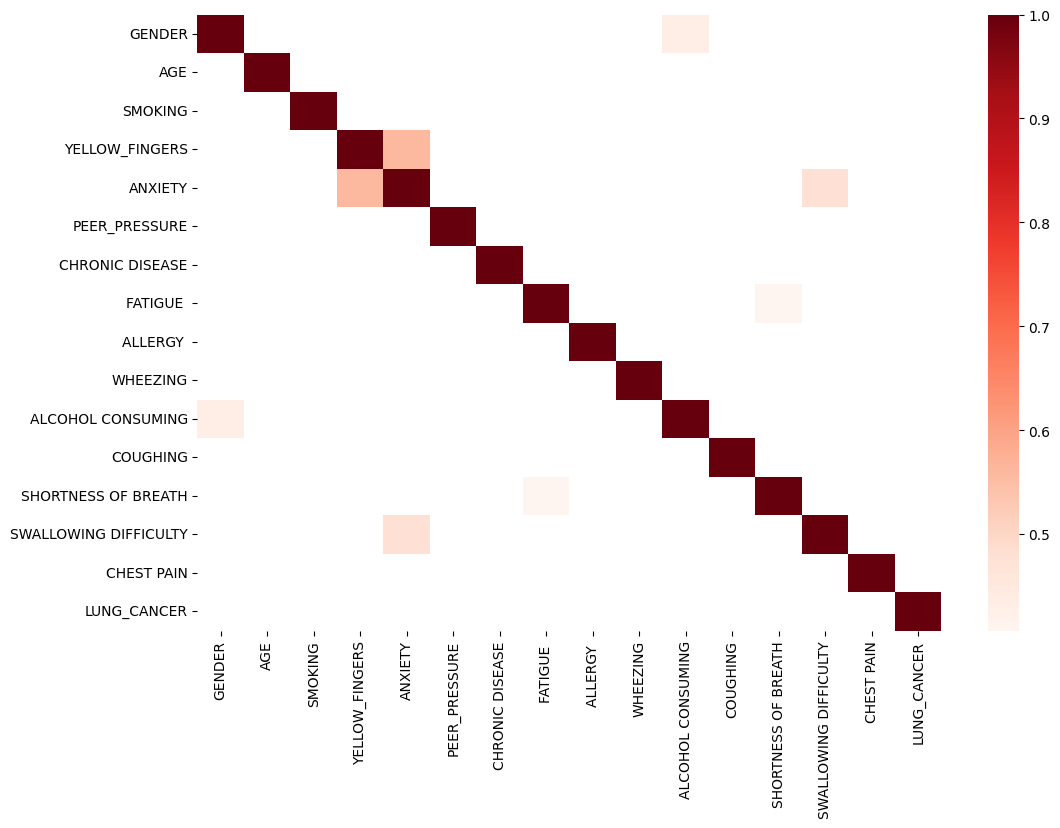

In [19]:
idf= corr[corr>=.40]
plt.figure(figsize=(12,8))
sns.heatmap(idf, cmap="Reds")

In [20]:
#Same effect
df['AN_FIN']=df['ANXIETY']*df['YELLOW_FINGERS']

In [21]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AN_FIN
0,1,0.727273,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1
1,1,0.803030,1,0,0,0,1,1,1,0,0,0,1,1,1,1,0
2,0,0.575758,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
3,1,0.636364,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1
4,0,0.636364,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,0.575758,0,1,1,1,0,0,1,1,0,1,0,1,0,1,1
280,0,0.575758,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
281,1,0.515152,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0
282,1,0.378788,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1


In [22]:
import pandas as pd

# Assuming df is your DataFrame
variance = df.var()

# Display variance of each column
print(variance)

# Optionally, filter columns with variance below a certain threshold
low_variance_columns = variance[variance < 0.1]  # Columns with variance < 0.1
print("Columns with low variance:\n", low_variance_columns)


GENDER                   0.250698
AGE                      0.016119
SMOKING                  0.249012
YELLOW_FINGERS           0.245099
ANXIETY                  0.250896
PEER_PRESSURE            0.250856
CHRONIC DISEASE          0.250435
FATIGUE                  0.224229
ALLERGY                  0.248682
WHEEZING                 0.248682
ALCOHOL CONSUMING        0.248327
COUGHING                 0.245099
SHORTNESS OF BREATH      0.233834
SWALLOWING DIFFICULTY    0.249842
CHEST PAIN               0.247536
LUNG_CANCER              0.119157
AN_FIN                   0.245099
dtype: float64
Columns with low variance:
 AGE    0.016119
dtype: float64


In [23]:
df.drop('AGE', axis=1, inplace=True)


In [24]:
df

,GENDER,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AN_FIN
0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1
1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,0
2,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
3,1,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1
4,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,0,1,1,1,0,0,1,1,0,1,0,1,0,1,1
280,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
281,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0
282,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1


In [25]:
#splitting the data for x and y

X= df.drop('LUNG_CANCER', axis=1)
y= df['LUNG_CANCER']

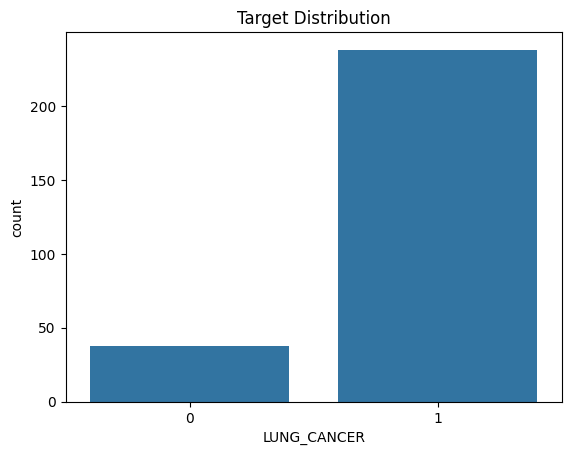

In [26]:
#distributaion of Target variable.
sns.countplot(x='LUNG_CANCER', data=df,)
plt.title('Target Distribution');

In [27]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [28]:
len(X)

478

In [29]:
#split the train test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

## Logistic Regression

In [30]:
#Fitting training data to the model
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=0)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [31]:
#Predicting result using testing data
y_lr_pred= lr_model.predict(X_test)
y_lr_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [32]:
#Model accuracy
from sklearn.metrics import classification_report, accuracy_score, f1_score,confusion_matrix, roc_auc_score
lr_cr=classification_report(y_test, y_lr_pred)
print(lr_cr)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        60
           1       0.95      0.93      0.94        60

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [33]:
# Confusion Matrix
lr_conf_matrix = confusion_matrix(y_test, y_lr_pred)
print("Confusion Matrix:\n", lr_conf_matrix)

Confusion Matrix:
 [[57  3]
 [ 4 56]]


In [34]:
y_lr_prob = lr_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_lr_prob)
print("AUC Score:", auc_score)

AUC Score: 0.9941666666666666


In [35]:
# Calculating accuracy for the training set
train_accuracy = lr_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

# Calculating accuracy for the test set
test_accuracy = accuracy_score(y_test, y_lr_pred)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9245810055865922
Test Set Accuracy: 0.9416666666666667


#Decision Tree

In [36]:
#Fitting training data to the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
#Predicting result using testing data
y_dt_pred= dt_model.predict(X_test)
y_dt_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [38]:
#Model accuracy
dt_cr=classification_report(y_test, y_dt_pred)
print(dt_cr)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        60
           1       0.96      0.90      0.93        60

    accuracy                           0.93       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.93      0.93       120



In [39]:
# Confusion Matrix
dt_conf_matrix = confusion_matrix(y_test, y_dt_pred)
print("Confusion Matrix:\n", dt_conf_matrix)



Confusion Matrix:
 [[58  2]
 [ 6 54]]


In [40]:
y_dt_prob = dt_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_dt_prob)
print("AUC Score:", auc_score)

AUC Score: 0.96125


In [41]:
# Calculating accuracy for the training set
train_accuracy = dt_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

# Calculating accuracy for the test set
test_accuracy = accuracy_score(y_test, y_dt_pred)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9720670391061452
Test Set Accuracy: 0.9333333333333333


##Gaussian Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB()

In [43]:
#Predicting result using testing data
y_gnb_pred= gnb_model.predict(X_test)
y_gnb_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [44]:
#Model accuracy
gnb_cr=classification_report(y_test, y_gnb_pred)
print(gnb_cr)

              precision    recall  f1-score   support

           0       0.95      0.87      0.90        60
           1       0.88      0.95      0.91        60

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



In [45]:
# Confusion Matrix
gnb_conf_matrix = confusion_matrix(y_test, y_gnb_pred)
print("Confusion Matrix:\n", gnb_conf_matrix)



Confusion Matrix:
 [[52  8]
 [ 3 57]]


In [46]:
y_gnb_prob = gnb_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_gnb_prob)
print("AUC Score:", auc_score)

AUC Score: 0.9841666666666665


In [47]:
# Calculating accuracy for the training set
train_accuracy = gnb_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

# Calculating accuracy for the test set
test_accuracy = accuracy_score(y_test, y_gnb_pred)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.8854748603351955
Test Set Accuracy: 0.9083333333333333


## Multinomial Naive Bayes

In [48]:
#Fitting Multinomial Naive Bayes classifier to the training set
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train, y_train)

MultinomialNB()

In [49]:
#Predicting result using testing data
y_mnb_pred= mnb_model.predict(X_test)
y_mnb_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0])

In [50]:
#Model accuracy
mnb_cr=classification_report(y_test, y_mnb_pred)
print(mnb_cr)


              precision    recall  f1-score   support

           0       0.85      0.83      0.84        60
           1       0.84      0.85      0.84        60

    accuracy                           0.84       120
   macro avg       0.84      0.84      0.84       120
weighted avg       0.84      0.84      0.84       120



In [51]:
# Confusion Matrix
mnb_conf_matrix = confusion_matrix(y_test, y_mnb_pred)
print("Confusion Matrix:\n", mnb_conf_matrix)



Confusion Matrix:
 [[50 10]
 [ 9 51]]


In [52]:
y_mnb_prob = mnb_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_mnb_prob)
print("AUC Score:", auc_score)

AUC Score: 0.8905555555555555


In [53]:
# Calculating accuracy for the training set
train_accuracy = mnb_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

# Calculating accuracy for the test set
test_accuracy = accuracy_score(y_test, y_mnb_pred)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.7960893854748603
Test Set Accuracy: 0.8416666666666667


##Support Vector Classifier

In [54]:
#Fitting SVC to the training set
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [55]:
#Predicting result using testing data
y_svc_pred= svc_model.predict(X_test)
y_svc_pred


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [56]:
#Model accuracy
svc_cr=classification_report(y_test, y_svc_pred)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.98      0.99        60

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [57]:
# Confusion Matrix
svc_conf_matrix = confusion_matrix(y_test, y_svc_pred)
print("Confusion Matrix:\n", svc_conf_matrix)



Confusion Matrix:
 [[60  0]
 [ 1 59]]


In [58]:
# Calculating accuracy for the training set
train_accuracy = svc_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

# Calculating accuracy for the test set
test_accuracy = accuracy_score(y_test, y_svc_pred)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9636871508379888
Test Set Accuracy: 0.9916666666666667


##Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
#Predicting result using testing data
y_rf_pred= rf_model.predict(X_test)
y_rf_pred


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [61]:
#Model accuracy
rf_cr=classification_report(y_test, y_rf_pred)
print(rf_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.98      0.98      0.98        60

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [62]:
# Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, y_rf_pred)
print("Confusion Matrix:\n", rf_conf_matrix)



Confusion Matrix:
 [[59  1]
 [ 1 59]]


In [63]:
y_rf_prob = rf_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_rf_prob)
print("AUC Score:", auc_score)

AUC Score: 0.996111111111111


In [64]:
# Calculating accuracy for the training set
train_accuracy = rf_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

# Calculating accuracy for the test set
test_accuracy = accuracy_score(y_test, y_rf_pred)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9720670391061452
Test Set Accuracy: 0.9833333333333333


##Gradient Boosting

In [65]:
#Training
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [66]:
#Predicting result using testing data
y_gb_pred= gb_model.predict(X_test)
y_gb_pred


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [67]:
#Model accuracy
gb_cr=classification_report(y_test, y_gb_pred)
print(gb_cr)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        60
           1       0.98      0.95      0.97        60

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [68]:
# Confusion Matrix
gb_conf_matrix = confusion_matrix(y_test, y_gb_pred)
print("Confusion Matrix:\n", gb_conf_matrix)



Confusion Matrix:
 [[59  1]
 [ 3 57]]


In [69]:
y_gb_prob = gb_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_gb_prob)
print("AUC Score:", auc_score)

AUC Score: 0.995


In [70]:
# Calculating accuracy for the training set
train_accuracy = gb_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

# Calculating accuracy for the test set
test_accuracy = accuracy_score(y_test, y_gb_pred)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9692737430167597
Test Set Accuracy: 0.9666666666666667


##XGBoost

In [71]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
#Predicting result using testing data
y_xgb_pred= xgb_model.predict(X_test)
y_xgb_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [73]:
#Model accuracy
xgb_cr=classification_report(y_test, y_xgb_pred)
print(xgb_cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.98      0.98      0.98        60

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [74]:
# Confusion Matrix
xgb_conf_matrix = confusion_matrix(y_test, y_xgb_pred)
print("Confusion Matrix:\n", xgb_conf_matrix)



Confusion Matrix:
 [[59  1]
 [ 1 59]]


In [75]:
y_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_xgb_prob)
print("AUC Score:", auc_score)

AUC Score: 0.995


In [76]:
# Calculating accuracy for the training set
train_accuracy = xgb_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

# Calculating accuracy for the test set
test_accuracy = accuracy_score(y_test, y_xgb_pred)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9692737430167597
Test Set Accuracy: 0.9833333333333333


##MLP - Multi-layer Perceptron classifier

In [77]:
#Training a neural network model
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier()
mlp_model.fit(X_train, y_train)

MLPClassifier()

In [78]:
#Predicting result using testing data
y_mlp_pred= mlp_model.predict(X_test)
y_mlp_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [79]:
#Model accuracy
mlp_cr=classification_report(y_test, y_mlp_pred)
print(mlp_cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.95      0.97        60

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [80]:
# Confusion Matrix
mlp_conf_matrix = confusion_matrix(y_test, y_mlp_pred)
print("Confusion Matrix:\n", mlp_conf_matrix)



Confusion Matrix:
 [[60  0]
 [ 3 57]]


In [81]:
y_mlp_prob = mlp_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_mlp_prob)
print("AUC Score:", auc_score)

AUC Score: 0.9988888888888889


In [82]:
# Calculating accuracy for the training set
train_accuracy = mlp_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

# Calculating accuracy for the test set
test_accuracy = accuracy_score(y_test, y_mlp_pred)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9608938547486033
Test Set Accuracy: 0.975


##KNN

In [83]:
#Fitting K-NN classifier to the training set
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [84]:
#Predicting result using testing data
y_knn_pred= knn_model.predict(X_test)
y_knn_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [85]:
#Model accuracy
knn_cr=classification_report(y_test, y_knn_pred)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        60
           1       1.00      0.93      0.97        60

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [86]:
# Confusion Matrix
knn_conf_matrix = confusion_matrix(y_test, y_knn_pred)
print("Confusion Matrix:\n", knn_conf_matrix)



Confusion Matrix:
 [[60  0]
 [ 4 56]]


In [87]:
y_knn_prob = knn_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_knn_prob)
print("AUC Score:", auc_score)

AUC Score: 0.9870833333333335


In [88]:
# Calculating accuracy for the training set
train_accuracy = knn_model.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

# Calculating accuracy for the test set
test_accuracy = accuracy_score(y_test, y_knn_pred)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9357541899441341
Test Set Accuracy: 0.9666666666666667


##AdaBoost

In [89]:
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)

# Initialize the AdaBoost classifier
ada = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

# Train the model
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [90]:
#Predicting result using testing data
y_ada_pred= ada.predict(X_test)
y_ada_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1])

In [91]:
#Model accuracy
ada_cr=classification_report(y_test, y_ada_pred)
print(ada_cr)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        60
           1       0.95      0.97      0.96        60

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [92]:
# Confusion Matrix
ada_conf_matrix = confusion_matrix(y_test, y_ada_pred)
print("Confusion Matrix:\n", ada_conf_matrix)



Confusion Matrix:
 [[57  3]
 [ 2 58]]


In [93]:
y_ada_prob = ada.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_ada_prob)
print("AUC Score:", auc_score)

AUC Score: 0.9930555555555556


In [94]:
# Calculating accuracy for the training set
train_accuracy = ada.score(X_train, y_train)
print("Training Set Accuracy:", train_accuracy)

# Calculating accuracy for the test set
test_accuracy = accuracy_score(y_test, y_ada_pred)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9273743016759777
Test Set Accuracy: 0.9583333333333334


#Cross Validation

In [95]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Multinomial naive bayes model
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, y, cv=kf)

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)

#  Adaboost model
ada_model_scores = cross_val_score(ada ,X, y, cv=kf)

print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("AdaBoost models' average accuracy:", np.mean(ada_model_scores))

Logistic regression models' average accuracy: 0.9226063829787232
Decision tree models' average accuracy: 0.9351063829787233
KNN models' average accuracy: 0.9393173758865249
Gaussian naive bayes models' average accuracy: 0.8702127659574469
Multinomial naive bayes models' average accuracy: 0.7824024822695035
Support Vector Classifier models' average accuracy: 0.9372783687943261
Random forest models' average accuracy: 0.9519060283687943
XGBoost models' average accuracy: 0.947695035460993
Gradient boost models' average accuracy: 0.949822695035461
Multi-layer perceptron models' average accuracy: 0.9456560283687944
AdaBoost models' average accuracy: 0.9267730496453899


##Stratified K Fold


In [96]:
# stratified K-Fold Cross Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

k = 10
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)


# Logistic regerssion model
lr_model_scores = cross_val_score(lr_model,X, y, cv=kf)

# Decision tree model
dt_model_scores = cross_val_score(dt_model,X, y, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn_model,X, y, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_model,X, y, cv=kf)

# Multinomial naive bayes model
mnb_model_scores = cross_val_score(mnb_model,X, y, cv=kf)

# Support Vector Classifier model
svc_model_scores = cross_val_score(svc_model,X, y, cv=kf)

# Random forest model
rf_model_scores = cross_val_score(rf_model,X, y, cv=kf)

# XGBoost model
xgb_model_scores = cross_val_score(xgb_model,X, y, cv=kf)

# Multi-layer perceptron model
mlp_model_scores = cross_val_score(mlp_model,X, y, cv=kf)

# Gradient boost model
gb_model_scores = cross_val_score(gb_model,X, y, cv=kf)

#  Adaboost model
ada_model_scores = cross_val_score(ada ,X, y, cv=kf)

print("Logistic regression models' average accuracy:", np.mean(lr_model_scores))
print("Decision tree models' average accuracy:", np.mean(dt_model_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Multinomial naive bayes models' average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svc_model_scores))
print("Random forest models' average accuracy:", np.mean(rf_model_scores))
print("XGBoost models' average accuracy:", np.mean(xgb_model_scores))
print("Gradient boost models' average accuracy:", np.mean(gb_model_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_model_scores))
print("AdaBoost models' average accuracy:", np.mean(ada_model_scores))

Logistic regression models' average accuracy: 0.9246010638297874
Decision tree models' average accuracy: 0.9328900709219858
KNN models' average accuracy: 0.9475177304964539
Gaussian naive bayes models' average accuracy: 0.8785904255319149
Multinomial naive bayes models' average accuracy: 0.7886524822695036
Support Vector Classifier models' average accuracy: 0.937145390070922
Random forest models' average accuracy: 0.9496897163120568
XGBoost models' average accuracy: 0.94552304964539
Gradient boost models' average accuracy: 0.9538563829787234
Multi-layer perceptron models' average accuracy: 0.937145390070922
AdaBoost models' average accuracy: 0.9246010638297874


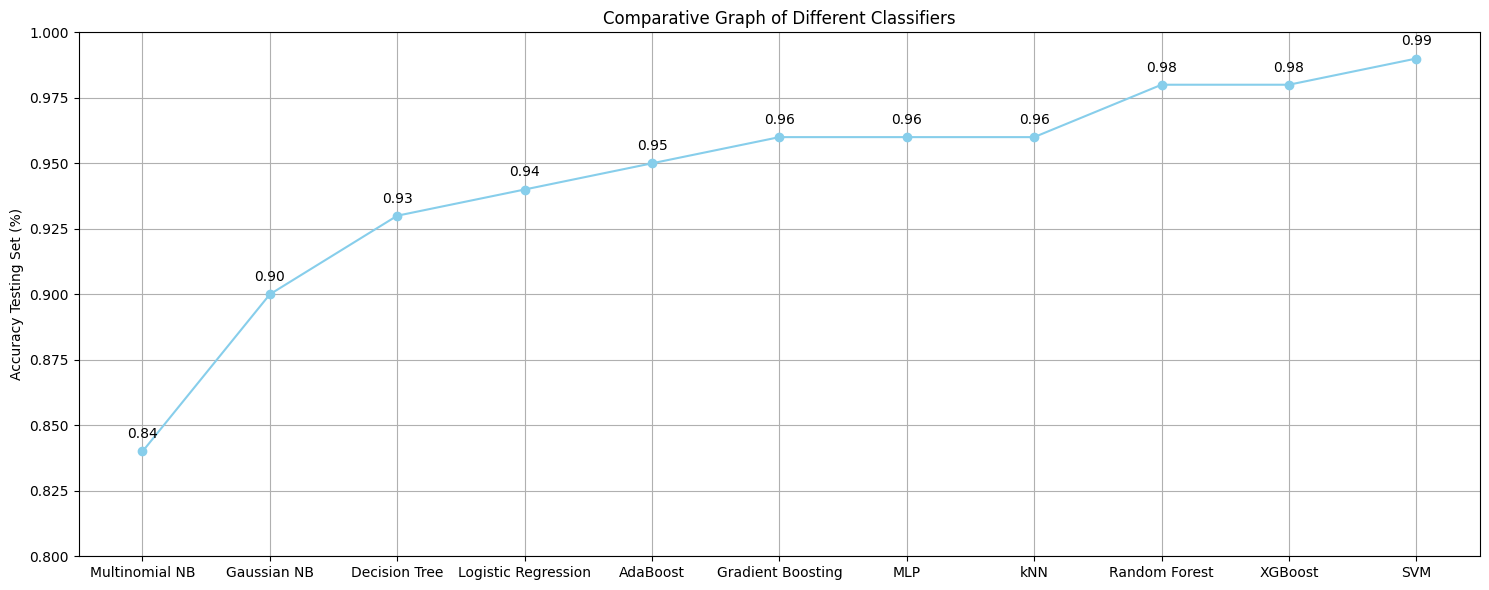

In [97]:
import matplotlib.pyplot as plt

# Data for the graph
models = ['Multinomial NB','Gaussian NB','Decision Tree','Logistic Regression',"AdaBoost","Gradient Boosting","MLP","kNN","Random Forest","XGBoost","SVM"]
accuracy_scores = [0.84, 0.90, 0.93,0.94, 0.95, 0.96,0.96, 0.96,0.98,0.98,0.99]

# Creating the line plot
plt.figure(figsize=(15, 6))
plt.plot(models, accuracy_scores, marker='o', linestyle='-', color='skyblue')

# Set the limits for the y-axis
plt.ylim(0.80, 1.00)

# Adding labels and title
plt.ylabel('Accuracy Testing Set (%)')
plt.title('Comparative Graph of Different Classifiers')

# Adding text labels for each point
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.005, f"{score:.2f}", ha='center')

# Show the grid and layout
plt.grid(True)
plt.tight_layout()

# Display  plot
plt.show()


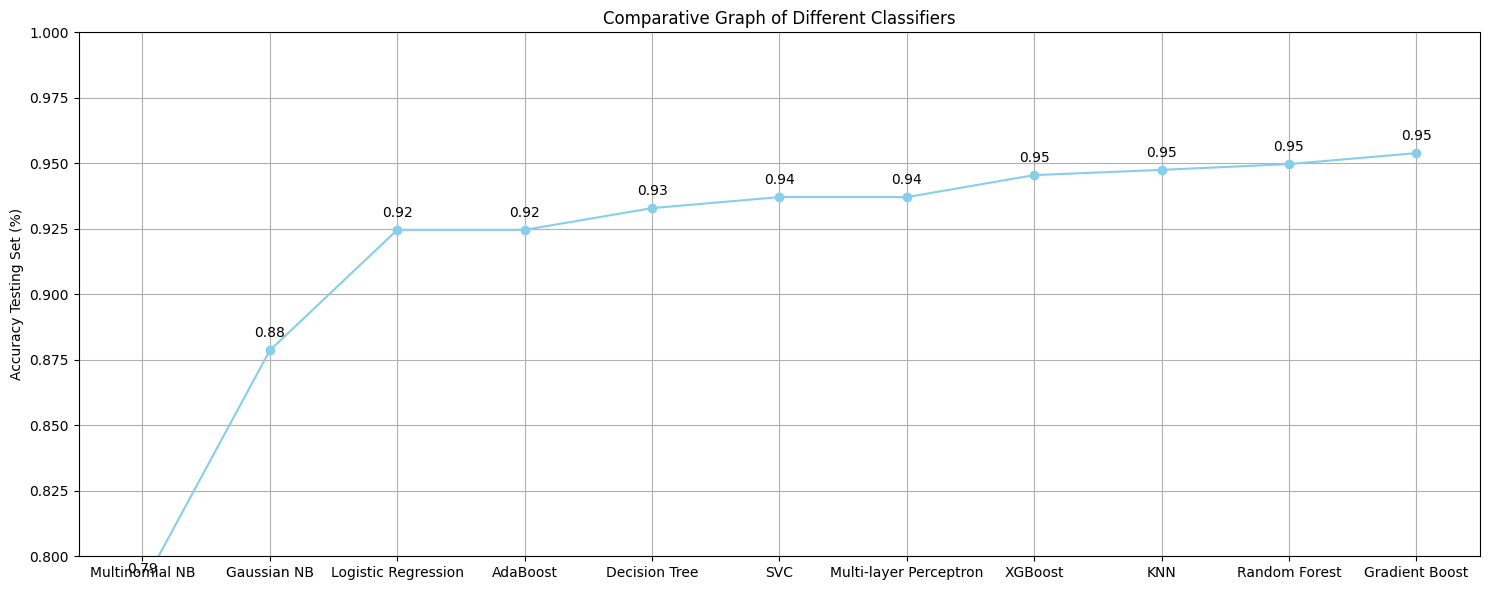

In [98]:
import matplotlib.pyplot as plt

# Data for the graph
models = ['Multinomial NB', 'Gaussian NB', 'Logistic Regression', 'AdaBoost', 'Decision Tree', 'SVC', 'Multi-layer Perceptron', 'XGBoost', 'KNN', 'Random Forest', 'Gradient Boost']
accuracy_scores = [0.7887, 0.8786, 0.9246, 0.9246, 0.9329, 0.9371, 0.9371, 0.9455, 0.9475, 0.9497, 0.9539]


# Creating the line plot
plt.figure(figsize=(15, 6))
plt.plot(models, accuracy_scores, marker='o', linestyle='-', color='skyblue')

# Set the limits for the y-axis
plt.ylim(0.80, 1.00)

# Adding labels and title
plt.ylabel('Accuracy Testing Set (%)')
plt.title('Comparative Graph of Different Classifiers')

# Adding text labels for each point
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.005, f"{score:.2f}", ha='center')

# Show the grid and layout
plt.grid(True)
plt.tight_layout()

# Display  plot
plt.show()

In [99]:
import pandas as pd

# Assuming 'df' is your updated DataFrame
df.to_csv('updated_dataset.csv', index=False)